In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2025-03-11 15:16:07--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2025-03-11 15:16:07 (33.4 MB/s) - ‘insurance.csv.1’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


**Get Dummies**

In [3]:
dataset = pd.get_dummies(dataset, columns=['sex', 'smoker', 'region'], drop_first=True, dtype=int)

**Load and Split Dataset**

In [4]:
from sklearn.model_selection import train_test_split

train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

**Normalize Data**

In [7]:
train_dataset = train_dataset.to_numpy()
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(train_dataset)

**Building and Compile the Model**

In [8]:
model = keras.Sequential([normalizer, tf.keras.layers.Dense(units = 1)])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.995),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error', 'mean_squared_error'])

**Training the Model**

In [9]:
model.fit(train_dataset, train_labels, epochs=1500)

Epoch 1/1500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13633.8105 - mean_absolute_error: 13633.8105 - mean_squared_error: 336865472.0000
Epoch 2/1500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13038.4619 - mean_absolute_error: 13038.4619 - mean_squared_error: 310019840.0000 
Epoch 3/1500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13110.4766 - mean_absolute_error: 13110.4766 - mean_squared_error: 315414112.0000
Epoch 4/1500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13574.1035 - mean_absolute_error: 13574.1035 - mean_squared_error: 334112384.0000
Epoch 5/1500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13276.3730 - mean_absolute_error: 13276.3730 - mean_squared_error: 321283424.0000
Epoch 6/1500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12495.1895 - mean_absolute_error: 12495.1895 - mean_squared_error: 281207424.0000
Epoch 7/1500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13036.6748 - mean_absolute_error: 13036.6748 - mean_squared_error: 317653824.0000
Epoch

**Evaluating the Model**

9/9 - 0s - 6ms/step - loss: 3160.5613 - mean_absolute_error: 3160.5613 - mean_squared_error: 43112716.0000
Testing set Mean Abs Error: 3160.56 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


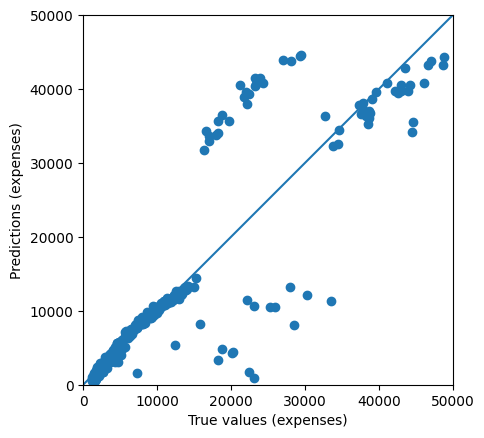

In [11]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
